In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Hierarchical Clustering**

Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It's an alternative to centroid-based clustering like K-means and has its own unique set of characteristics and applications:

**Types:**

Agglomerative (Bottom-Up): Starts with each data point as a single cluster and then successively merges clusters until all points are merged into a single cluster. This is the most common approach.

Divisive (Top-Down): Starts with all data points in a single cluster and recursively splits the cluster into smaller clusters.
Process:

In agglomerative clustering, at each step, the pair of clusters with the smallest distance between them are merged.
In divisive clustering, at each step, a cluster is split into two.
Distance Metrics: The choice of distance metric is crucial in hierarchical clustering and can significantly affect the outcome. Common metrics include Euclidean distance, Manhattan distance, and Cosine similarity.

**Linkage Criteria:** Determines how the distance between clusters is measured. Common linkage criteria include:

Single Linkage: Distance between the closest members of two clusters.

Complete Linkage: Distance between the furthest members of two clusters.

Average Linkage: Average distance between all members of two clusters.

Ward’s Method: Minimizes the variance within the clusters.

**Dendrogram:**

A tree-like diagram that records the sequences of merges or splits.
The height of each merge in the dendrogram represents the distance between the two clusters being merged.
Allows visualizing the clustering process and deciding the number of clusters by cutting the dendrogram at a desired level.

**Applications:**

Ideal for smaller datasets where the nuances of hierarchical relationships and cluster formations are important.
Commonly used in bioinformatics, for example, in the analysis of gene expression data.

**Advantages:**

Does not require specifying the number of clusters a priori.
Provides more information about the data structure through the dendrogram.

**Limitations:**

Computationally intensive for large datasets.
Sensitive to noise and outliers.
Once a merge or split is done, it cannot be undone, which may lead to suboptimal solutions.

In [18]:
import pandas as pd

file = '/content/drive/MyDrive/Data_Mining_CMPE_255/Starbucks_data.csv'
data = pd.read_csv(file)

data.head()

,TimeIndex,HotBeverageIndex
0,1,5
1,1,7
2,2,6
3,2,9
4,3,6


The above data records which Hotbeverage was sold at what time on a particular day.

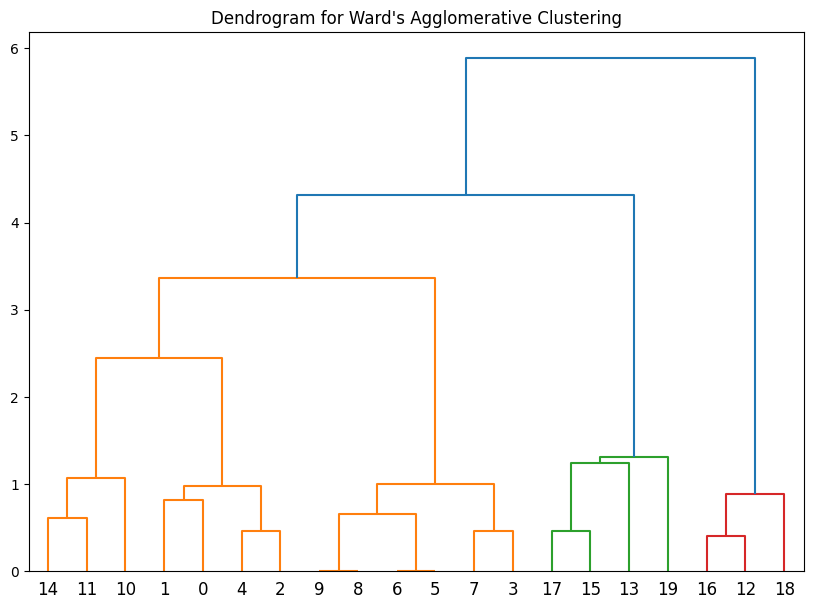

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

data = data.values

# Standardize the data points
scaler = StandardScaler()
data_points_standardized = scaler.fit_transform(data)

# Perform ward agglomerative clustering
linked = linkage(data_points_standardized, method='ward')
# Plotting the dendrogram
# Custom labels for the dendrogram
# labels = ['A1' ,'A2', 'A3', 'A4' ,'A5', 'A6', 'A7' ,'A8', 'A9', 'A10' ,'A11', 'A12']
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title('Dendrogram for Ward\'s Agglomerative Clustering')
plt.show()

From the above Dendogram, 3 seems to be a good level to cut the dendogram

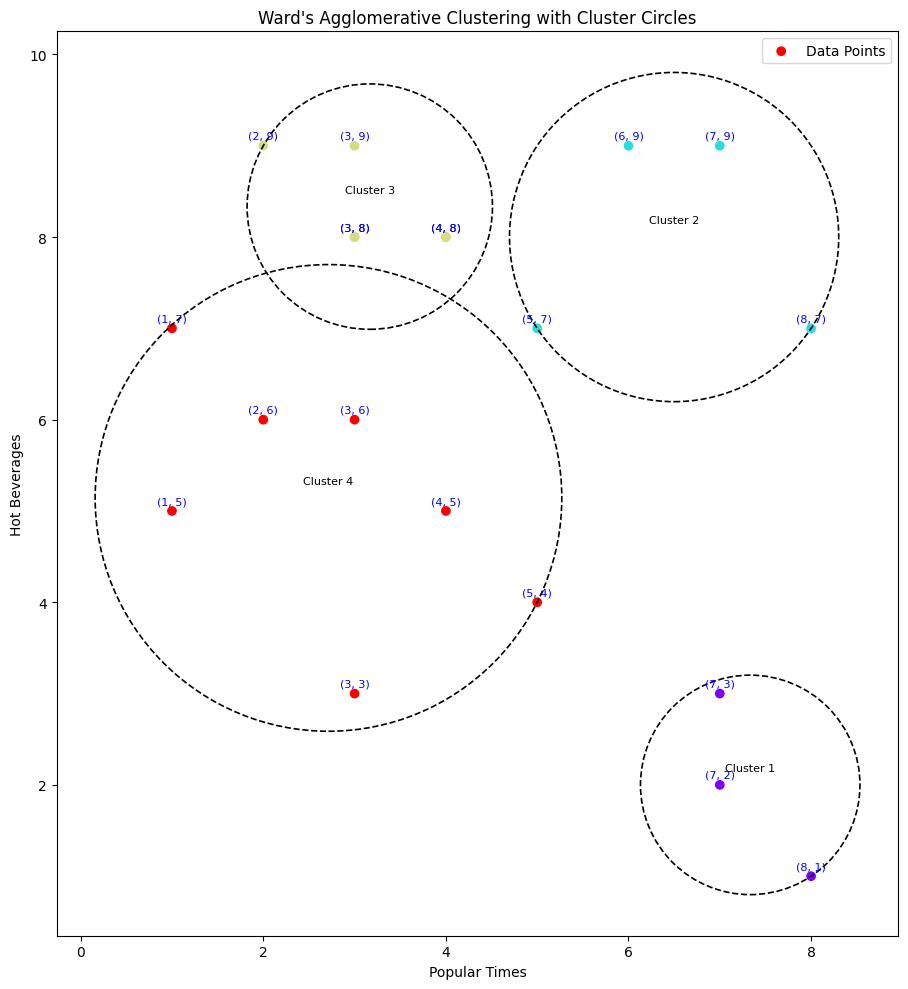

In [20]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Extracting clusters using the specified maximum distance
max_d = 3  # Adjusted value based on the dendrogram
clusters = fcluster(linked, max_d, criterion='distance')

# Plotting the clustered data
plt.figure(figsize=(12, 10))
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='rainbow', label='Data Points')

# Label the data points with coordinates
for coord in data:
    plt.annotate(f'({coord[0]}, {coord[1]})', (coord[0], coord[1]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='blue')

# Find and draw circles around clusters
num_clusters = np.max(clusters)
for i in range(1, num_clusters + 1):
    # Extract points in this cluster
    cluster_points = data[clusters == i]

    # Calculate centroid
    centroid = np.mean(cluster_points, axis=0)

    # Calculate the distance of all points in the cluster from the centroid
    distances = np.linalg.norm(cluster_points - centroid, axis=1)

    # Find the maximum distance to determine the radius of the circle
    max_distance = np.max(distances)

    # Create a circle with centroid as the center and max_distance as radius
    circle = Circle(centroid, max_distance, color='black', fill=False, linestyle='--', linewidth=1.2)
    plt.gca().add_patch(circle)

    # Annotate the centroid
    plt.annotate(f'Cluster {i}', centroid, textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')

plt.title('Ward\'s Agglomerative Clustering with Cluster Circles')
plt.xlabel('Popular Times')
plt.ylabel('Hot Beverages')
plt.legend()
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box')  # Keep circles circular
plt.tight_layout()
plt.show()